# Imports and Configurations

In [58]:
import pandas as pd
import re
import nltk
from num2words import num2words

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from autocorrect import Speller
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
import seaborn as sns

nltk.download('rslp')

# dataset visibility
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

[nltk_data] Downloading package rslp to /Users/angelachow/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


     |████████████████████████████████| 622 kB 1.4 MB/s eta 0:00:01
  Created wheel for autocorrect: filename=autocorrect-2.5.0-py3-none-any.whl size=621854 sha256=90a9499cc09bed926e8f882cae86db5f188bdb91375bb8b9d3d5295ba0f90bb8
  Stored in directory: /Users/angelachow/Library/Caches/pip/wheels/da/03/6e/62a48359ab630e39939dbb392cc079923bb77664e97a47645d
Successfully built autocorrect
Note: you may need to restart the kernel to use updated packages.


# Functions

In [6]:
def remove_stop_words(text):
    for word in text:
        if word in stopwords.words('portuguese'):
            text.remove(word)
    return text

stemmer = RSLPStemmer()
spell = Speller('pt')

def spell_and_stem_words(text):
    for i in range(len(text)):
        text[i] = stemmer.stem(spell(text[i]))
    return text

dictionary for this language not found, downloading...
__________________________________________________
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Joining dataset

In [5]:
#final dataframe
df = pd.DataFrame()

In [6]:
# read all datasets

# orders dataset
orders = pd.read_csv('data/olist_orders_dataset.csv')

# order items dataset
items = pd.read_csv('data/olist_order_items_dataset.csv')

# sellers dataset
sellers = pd.read_csv('data/olist_sellers_dataset.csv')

# sellers dataset
customers = pd.read_csv('data/olist_customers_dataset.csv')

# reviews dataset
reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')

# products dataset
products = pd.read_csv('data/olist_products_dataset.csv')

# sellers dataset
payments = pd.read_csv('data/olist_order_payments_dataset.csv')

# categories dataset
categories = pd.read_csv('data/product_category_name_translation.csv')

In [7]:
df = orders

df = df.merge(customers, on='customer_id', how='left')
df = df.merge(payments, on='order_id', how='left')
df = df.merge(reviews, on='order_id', how='left')

df = df.merge(items, on='order_id', how='left')
df = df.merge(sellers, on='seller_id', how='left')
df = df.merge(products, on='product_id', how='left')
df = df.merge(categories, on='product_category_name', how='left')

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570.0,belo horizonte,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840.0,guariba,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [8]:
df.to_csv('data/merged_dataset.csv')

# EDA

## Customers

In [9]:
customers.info()
customers.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
cust = customers["customer_unique_id"].nunique()
print(cust, "unique customers")

96096 unique customers


There are 4119 unique cities in the dataset. The Top 10 cities based on customers_id are:
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_id, dtype: int64

Top 10 cities covers 35.2 percent of all the orders.


<AxesSubplot:xlabel='customer_city'>

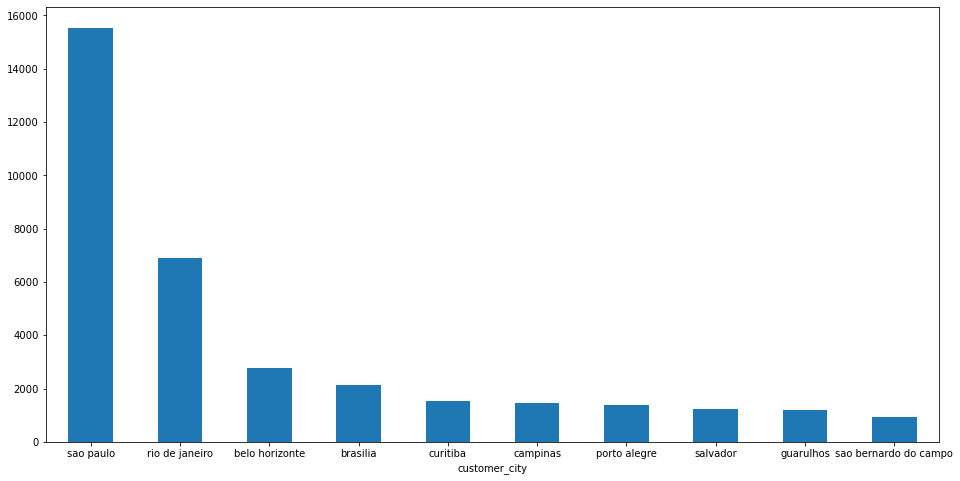

In [22]:
cities = customers["customer_city"].nunique()
c1 = customers.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)
print("There are",cities,"unique cities in the dataset. The Top 10 cities based on customers_id are:")
c2 = c1.head(10)
print(c2)
print("\nTop 10 cities covers", round(c2.sum()/customers.shape[0]*100,1),"percent of all the orders.")
plt.figure(figsize=(16,8))
c2.plot(kind="bar",rot=0)

There are 4119 unique states in the dataset. The Top 5 states are:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: customer_id, dtype: int64

Top 10 states covers 77.2 percent of all the orders.


<AxesSubplot:xlabel='customer_state'>

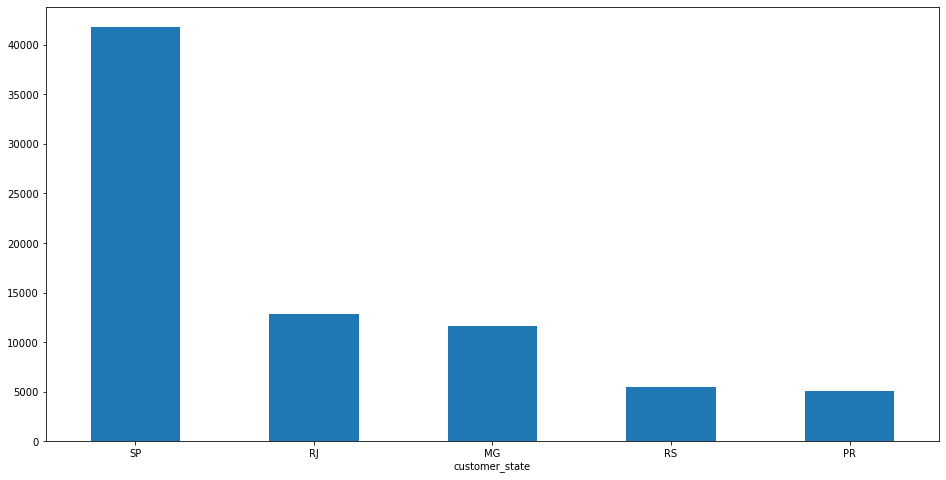

In [29]:
state = customers["customer_state"].nunique()
c1 = customers.groupby('customer_state')['customer_id'].nunique().sort_values(ascending=False)
print("There are",cities,"unique states in the dataset. The Top 5 states are:")
c2 = c1.head(5)
print(c2)
print("\nTop 10 states covers", round(c2.sum()/customers.shape[0]*100,1),"percent of all the orders.")
plt.figure(figsize=(16,8))
c2.plot(kind="bar",rot=0)

## Orders

In [14]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [17]:
orders.info()
customers.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [23]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [24]:
orders_mod = orders.copy()
orders_mod["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S')
orders_mod["order_delivered_carrier_date"] = pd.to_datetime(orders["order_delivered_carrier_date"], format='%Y-%m-%d %H:%M:%S')
orders_mod["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"], format='%Y-%m-%d %H:%M:%S')
orders_mod["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"], format='%Y-%m-%d %H:%M:%S')
orders_mod.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [25]:
orders_mod.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


<AxesSubplot:xlabel='order_purchase_timestamp'>

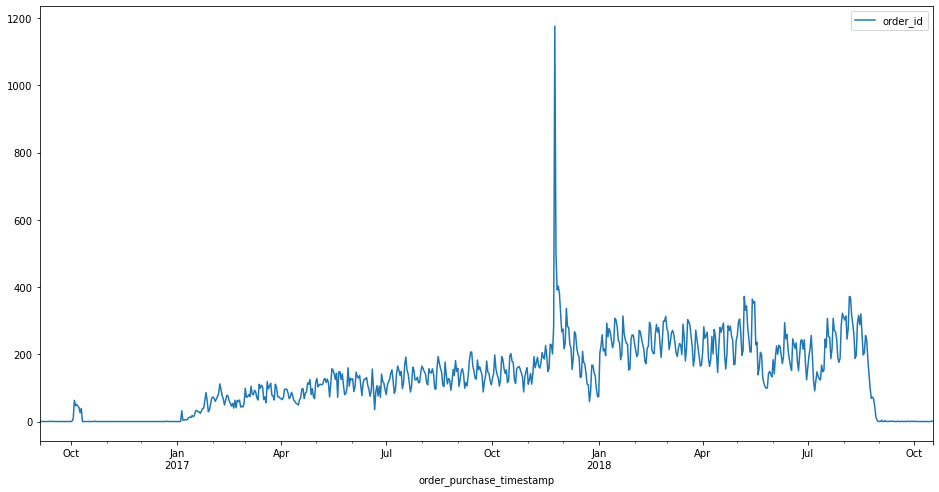

In [26]:
##Viz on when purchases are made during period in dataset.
counts = orders_mod.set_index("order_purchase_timestamp").groupby(pd.Grouper(freq='D')).count()
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
counts.plot(y = "order_id", use_index=True, ax=ax)

There are 8 unique order_status in the dataset.
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: customer_id, dtype: int64

Delivered status covers 97.0 percent of all the orders.


<AxesSubplot:xlabel='order_status'>

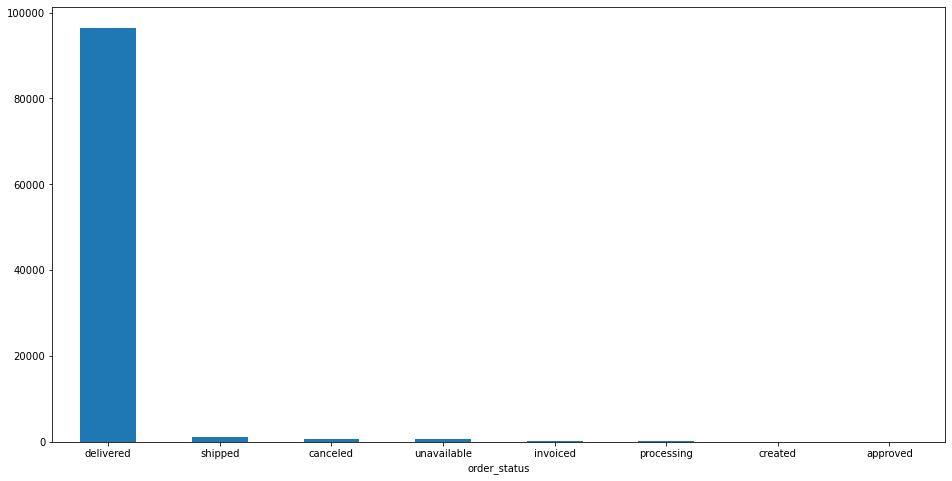

In [35]:
##Identifies orderstatus distribution
orderstatus = orders["order_status"].nunique()
o1 = orders.groupby('order_status')['customer_id'].nunique().sort_values(ascending=False)
print("There are",orderstatus,"unique order_status in the dataset.")
o2 = o1.head(8)
print(o2)
o3 = o1.head(1)
print("\nDelivered status covers", round(o3.sum()/orders.shape[0]*100,1),"percent of all the orders.")
plt.figure(figsize=(16,8))
o2.plot(kind="bar",rot=0)

KeyError: 'Column not found: order_items_qty'

## Order Reviews

In [66]:
reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [21]:
reviews.isnull().values.any()

True

In [20]:
# Determine how many missing data instances
reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [71]:
# Address missing data - we can see that there is a review score but not necessarily a comment or a title. Should we make it "none?"
reviews["review_comment_title"].fillna("None", inplace = True)
reviews["review_comment_message"].fillna("None", inplace = True)
reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

## Items

In [16]:
items.info()
items.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

There are                                 order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b510

<AxesSubplot:xlabel='seller_id'>

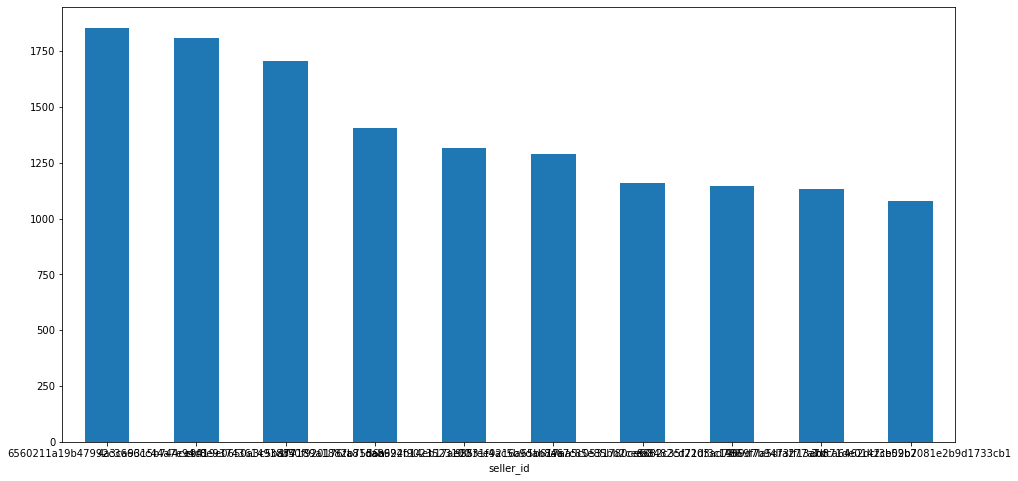

In [39]:
sellerinfo = items["seller_id"].nunique()
o1 = items.groupby('seller_id')['order_id'].nunique().sort_values(ascending=False)
print("There are",items,"unique items in the dataset.")
o2 = o1.head(10)
print(o2)

print("\nTop 10 items covers", round(o2.sum()/orders.shape[0]*100,1),"percent of all the orders.")
plt.figure(figsize=(16,8))
o2.plot(kind="bar",rot=0)

## Sellers

In [12]:
sellers.info()
sellers.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

There are 3095 unique sellers in the dataset.
seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
Name: seller_id, dtype: int64

Top Seller by city covers 1.2 percent of all the sellers.


<AxesSubplot:xlabel='seller_city'>

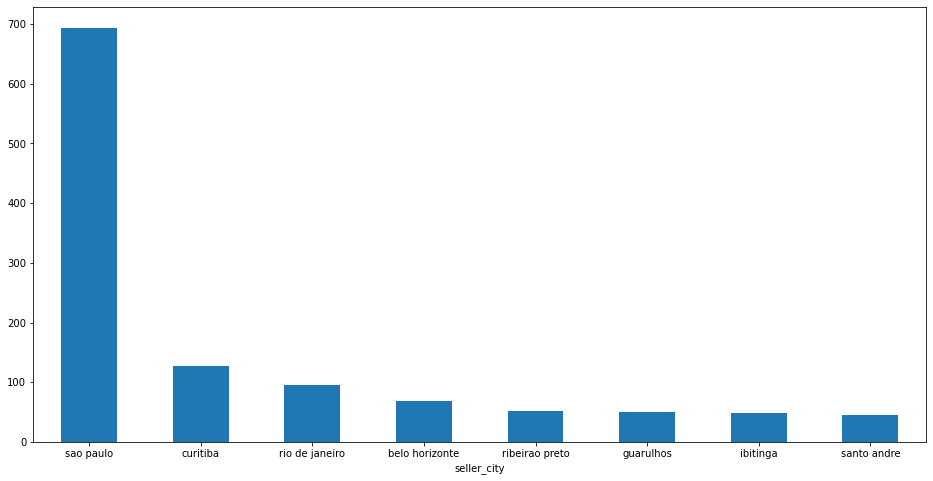

In [46]:
sellerstatus = sellers["seller_id"].nunique()
o1 = sellers.groupby('seller_city')['seller_id'].nunique().sort_values(ascending=False)
print("There are",sellerstatus,"unique sellers in the dataset.")
o2 = o1.head(8)
print(o2)

print("\nTop Seller by city covers", round(o2.sum()/orders.shape[0]*100,1),"percent of all the sellers.")
plt.figure(figsize=(16,8))
o2.plot(kind="bar",rot=0)

There are 3095 unique sellers in the dataset.
seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
Name: seller_id, dtype: int64

Top Sellers by state represents 3.0 percent of all the sellers.


<AxesSubplot:xlabel='seller_state'>

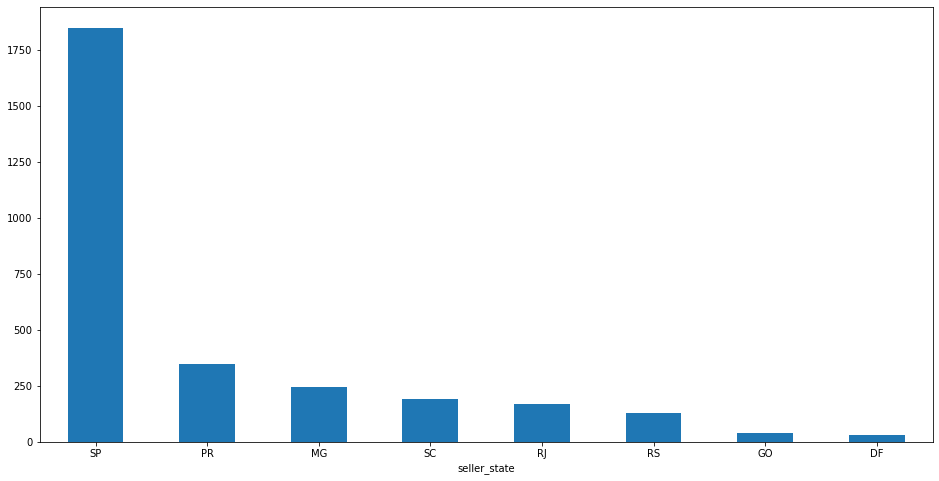

In [48]:
sellerstatus = sellers["seller_id"].nunique()
o1 = sellers.groupby('seller_state')['seller_id'].nunique().sort_values(ascending=False)
print("There are",sellerstatus,"unique sellers in the dataset.")
o2 = o1.head(8)
print(o2)

print("\nTop Sellers by state represents", round(o2.sum()/orders.shape[0]*100,1),"percent of all the sellers.")
plt.figure(figsize=(16,8))
o2.plot(kind="bar",rot=0)

## Products

In [64]:
products.info()
products.isnull().sum()
# need to fix missing data 610 is the same entry but missing description. 2 items also missing (1 competely missing all except ID
#other one is just missing weight, lenght, height, width) Dtypes changed from float64 to object as a result of replacing NA
products["product_category_name"].fillna("None", inplace = True)
products["product_name_lenght"].fillna("None", inplace = True)
products["product_description_lenght"].fillna("None", inplace = True)
products["product_photos_qty"].fillna("None", inplace = True)
products["product_weight_g"].fillna("0", inplace = True)
products["product_length_cm"].fillna("0", inplace = True)
products["product_height_cm"].fillna("0", inplace = True)
products["product_width_cm"].fillna("0", inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  32951 non-null  object
 1   product_category_name       32951 non-null  object
 2   product_name_lenght         32951 non-null  object
 3   product_description_lenght  32951 non-null  object
 4   product_photos_qty          32951 non-null  object
 5   product_weight_g            32951 non-null  object
 6   product_length_cm           32951 non-null  object
 7   product_height_cm           32951 non-null  object
 8   product_width_cm            32951 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB


In [63]:
products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [56]:
most_product=df.groupby('product_category_name_english').aggregate({'order_id':'count'}).rename(columns={'order_id':'order_count'}).sort_values(by='order_count',ascending=False).reset_index()
most_product.head()

,product_category_name_english,order_count
0,bed_bath_table,11990
1,health_beauty,10033
2,sports_leisure,9005
3,furniture_decor,8833
4,computers_accessories,8151


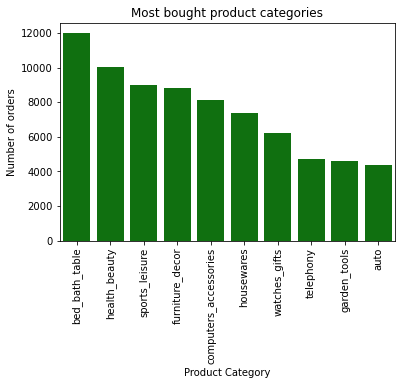

In [60]:
### Visualising top 10 most bought product categories:
sns.barplot(x='product_category_name_english',y='order_count',data=most_product[:10],color="green")
plt.xlabel("Product Category")
plt.ylabel("Number of orders")
plt.title("Most bought product categories")
plt.xticks(rotation='vertical')
plt.show()

There are 32951 unique products in the dataset.
product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

Top 10 Products by category represent 20.9 percent of all the products.


<AxesSubplot:xlabel='product_category_name_english'>

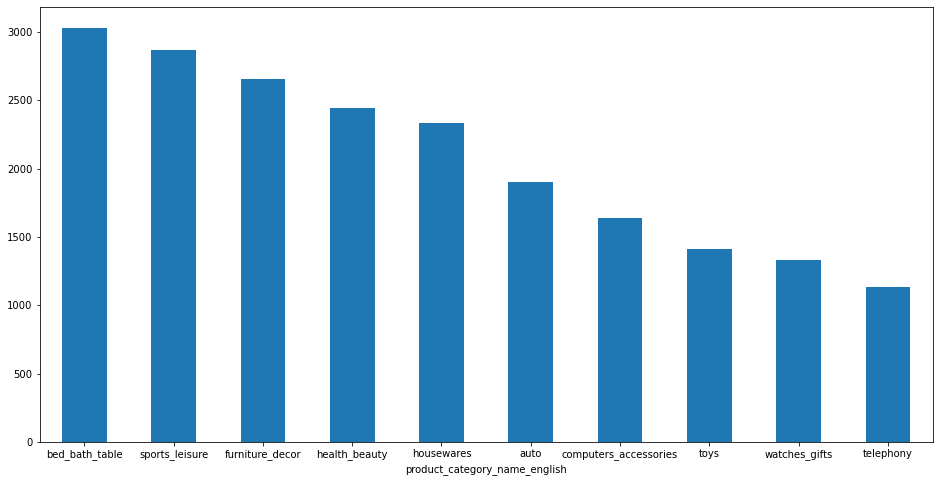

In [69]:
prodcat= df["product_id"].nunique()
o1 = df.groupby('product_category_name_english')['product_id'].nunique().sort_values(ascending=False)
print("There are",prodcat,"unique products in the dataset.")
o2 = o1.head(10)
print(o2)

print("\nTop 10 Products by category represent", round(o2.sum()/orders.shape[0]*100,1),"percent of all the products.")
plt.figure(figsize=(16,8))
o2.plot(kind="bar",rot=0)

## Payment

In [38]:
payments.info()
payments.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

## Categories

In [30]:
categories.info()
categories.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


product_category_name            0
product_category_name_english    0
dtype: int64

# NLP

In [40]:
# we are going to work with only reviews dataset
reviews = reviews.dropna()
reviews.head(100)

reviews_only = reviews[reviews['review_score'] == 1]
reviews_only = reviews_only['review_comment_message']
# replace numbers of words
reviews_only = reviews_only.apply(lambda t: re.sub(r"(\d+)", lambda x: num2words(int(x.group(0))), t))
# replace special characters
reviews_only = reviews_only.apply(lambda t: re.sub('[^A-zÀ-ú\s]/gi', ' ', t))
# make all letters in a lower case
reviews_only = reviews_only.apply(lambda t: t.lower())

# tokenize text and remove stop words
tokenized_reviews = reviews_only.apply(lambda t: word_tokenize(t))
tokenized_reviews = tokenized_reviews.apply(lambda t: remove_stop_words(t))

# spell check and stemming
tokenized_reviews = tokenized_reviews.apply(lambda t: spell_and_stem_words(t))

tokenized_reviews.head(100)

reviews_text = tokenized_reviews.apply(lambda t: " ".join(t))


In [51]:
# feature matrix
# creating the feature matrix
matrix = CountVectorizer(max_features=1000, ngram_range=(2, 4))
X = matrix.fit_transform(reviews_text).toarray()
matrix.vocabulary_
#

{'falt one': 335,
 'one produt': 556,
 'receb one': 787,
 'vei quebr': 978,
 'entreg que': 312,
 'ate agor': 70,
 'agor receb': 7,
 'minh compr': 447,
 'compr dia': 133,
 'sab que': 823,
 'que acontec': 730,
 'vai ser': 955,
 'sab que acontec': 824,
 'boa noit': 96,
 'zer real': 999,
 'um produt': 942,
 'produt defeit': 641,
 'até agor': 77,
 'solicit troc': 852,
 'produt ja': 660,
 'total satisfeit': 902,
 'aind receb': 28,
 'receb produt': 792,
 'aind receb produt': 29,
 'compr tão': 162,
 'tão produt': 930,
 'produt so': 691,
 'compr tão produt': 163,
 'devoluç produt': 202,
 'produt baix': 629,
 'baix qual': 92,
 'produt baix qual': 630,
 'descr produt': 193,
 'produt err': 650,
 'produt ped': 678,
 'ped cancel': 585,
 'fifteen dia': 345,
 'dia aind': 205,
 'aind não': 24,
 'não obtiv': 517,
 'obtiv respost': 538,
 'não obtiv respost': 518,
 'efet compr': 253,
 'compr pag': 150,
 'pag dua': 568,
 'dua unidad': 251,
 'unidad receb': 951,
 'receb apen': 765,
 'unidad aguard': 949,
 '